Put this in bluenose.
Before running, download the PyTPG directory into the same directory as this notebook.
on bluenose, run the following:

!pip install numpy
!pip install -e
!pip install bitarray
!pip install matplotlib
!pip install gym


In [1]:
#Run this block to make sure you have the dependancies installed
#Anything that doesn't work can usually be resolved using pip
import tpg
import numpy
import matplotlib.pyplot as plt
import gym
import gym.spaces
from gym import wrappers
from tpg.tpg_trainer import TpgTrainer
from tpg.tpg_agent import TpgAgent
import time
from IPython import display


In [2]:
#functions for rendering over Jupyter as used in Ryan Ameral's example
def show_state(env, step=0, name='', info=''):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (name, step, info))
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
#uses only red instead of RGB
def getState(state):
    state2 = []
    for x in state:
        for y in x:
            state2.append(y[0])
            
    return state2

In [3]:
#build openAI gym environment and print the size of the action space
env = gym.make('Breakout-v4')
#wrap the env object so that we can save video of the learning process :)
#note that this will end up saving to the directory which the code is saved in
env = wrappers.Monitor(env, './videos/breakout-experiment-1', force=True)
print(env.action_space)

Discrete(4)


**The follwing is the most basic implementation. 
It a basic generational selection procedure for the Breakout game based on visual input.
As is common practice in computer vision, RGB images have been downsized to one channel.

*WARNING!!!!!!
**THIS BLOCK OF CODE WILL TAKE !HOURS! TO RUN!!!!!!!!!!!

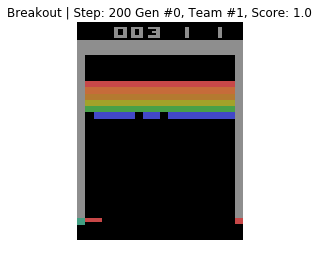

Time Taken (Seconds): 226.2499885559082
Results:
Min, Max, Avg
0.0 2.0 0.5


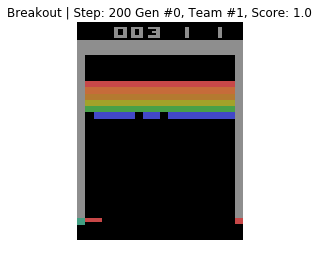

In [5]:
%matplotlib inline

#used to track time
tStart = time.time()

# first create an instance of the TpgTrainer
# this creates the whole population and everything
trainer = TpgTrainer(actions=range(4), teamPopSize=50)

curScores = [] # hold scores in a generation
summaryScores = [] # record score summaries for each gen (min, max, avg)

isDone = True
#Try running for 20 gens and see how long it takes.
for gen in range(20): # generation loop
    curScores = [] # new list per gen
    
    while True: # loop to go through agents
        teamNum = trainer.remainingAgents()
        agent = trainer.getNextAgent()
        if agent is None:
            break # no more agents, so proceed to next gen
        
        # check if agent already has score
        if agent.taskDone():
            score = agent.getOutcome()
        else:
            if isDone:
                state = env.reset() # get initial state and prep environment
            score = 0
            for i in range(201): # run episodes that last 200 frames
                show_state(env, i, 'Breakout', 'Gen #' + str(gen) + 
                           ', Team #' + str(teamNum) +
                           ', Score: ' + str(score)) # render env

                act = agent.act(getState(state)) # get action from agent

                # feedback from env
                state, reward, isDone, debug = env.step(act)
                score += reward # accumulate reward in score
                if isDone:
                    break # end early if losing state

            agent.reward(score) # must reward agent (if didn't already score)
            
        curScores.append(score) # store score
            
    # at end of generation, make summary of scores
    summaryScores.append((min(curScores), max(curScores),
                    sum(curScores)/len(curScores))) # min, max, avg
    trainer.evolve()
    
#clear_output(wait=True)
print('Time Taken (Seconds): ' + str(time.time() - tStart))
print('Results:\nMin, Max, Avg')
for result in summaryScores:
    print(result[0],result[1],result[2])